# Aprendizagem Automática II - Projeto

## Previsão da realização de assinaturas de depósito a prazo
Processo de análise exploratória dos dados

## Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Carregamento e Verificação dos Dados

In [2]:
data = pd.read_csv('../../Data_AA2/bank-additional-full.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Análise dos Dados

### Distribuição dos dados dos clientes

#### Distribuição de Idades

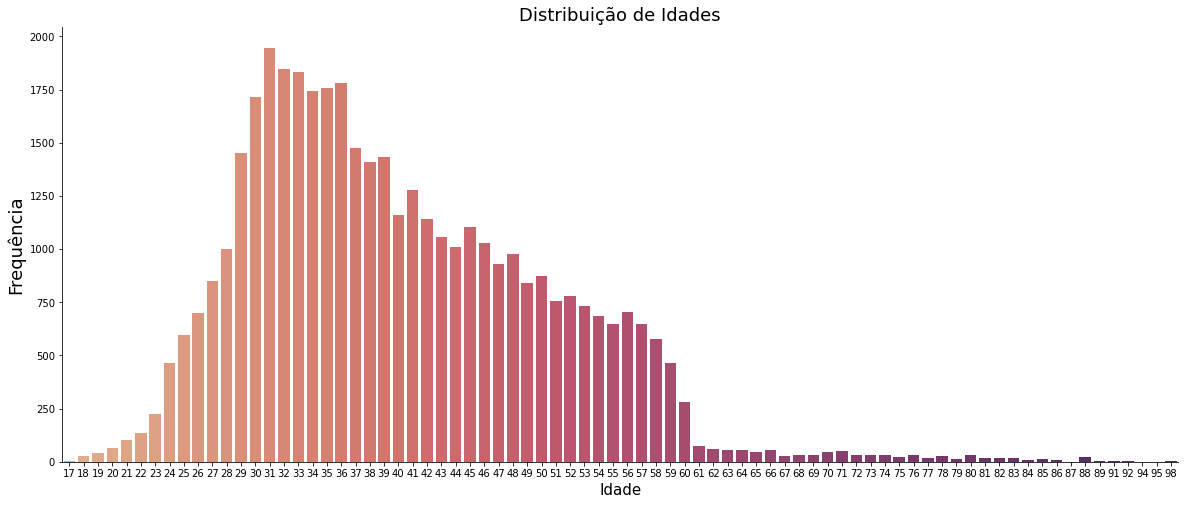

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = data, palette = "flare")
ax.set_xlabel('Idade', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição de Idades', fontsize=18)
sns.despine()

In [5]:
age_range = data.iloc[: , 0:1]
age_range.head()

,age
0,56
1,57
2,37
3,40
4,56


Agrupar idades por faixa etária

In [6]:
def age(df):
    df.loc[df['age'] <= 19, 'age'] = 1
    df.loc[(df['age'] > 19) & (df['age'] <= 30), 'age'] = 2
    df.loc[(df['age'] > 30) & (df['age'] <= 60), 'age'] = 3
    df.loc[(df['age'] > 60) & (df['age'] <= 98), 'age'] = 4
           
    return df

age(age_range);

3    32895
2     7308
4      910
1       75
Name: age, dtype: int64

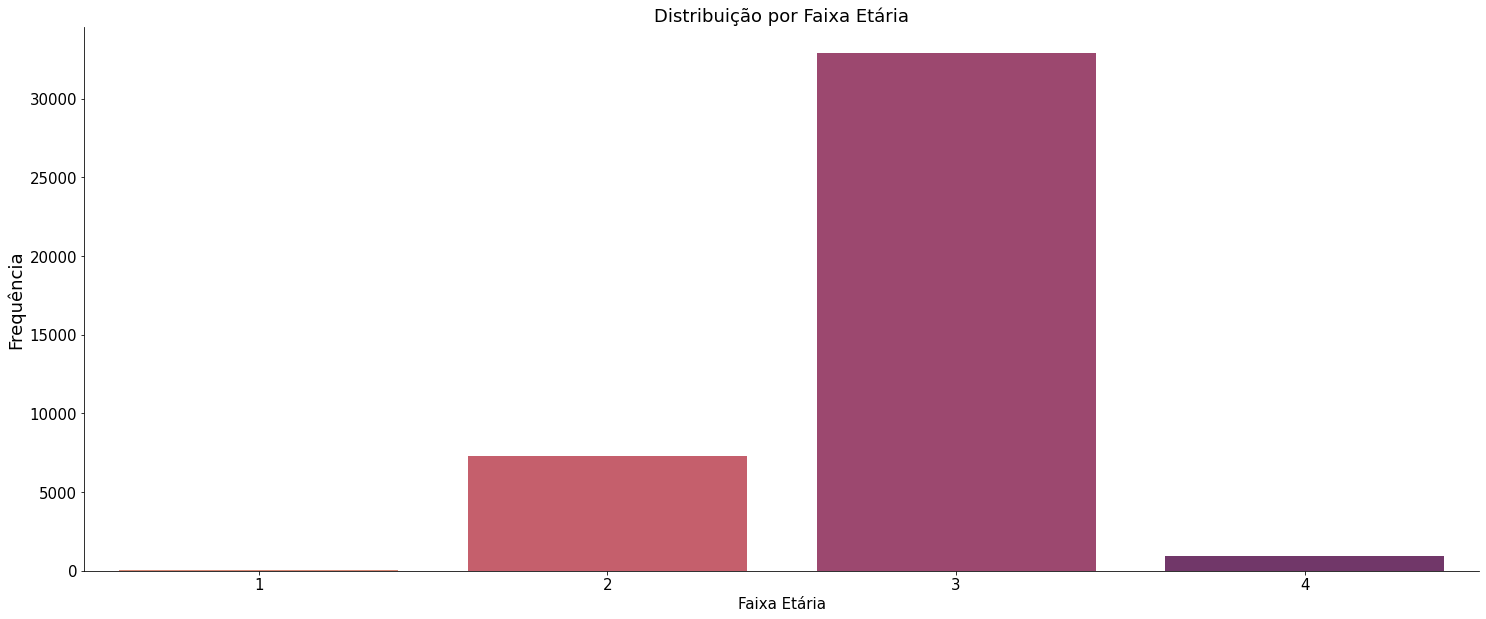

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'age', data = age_range, palette = "flare")
ax.set_xlabel('Faixa Etária', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição por Faixa Etária', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

age_range['age'].value_counts()

#### Distribuição de Emprego

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

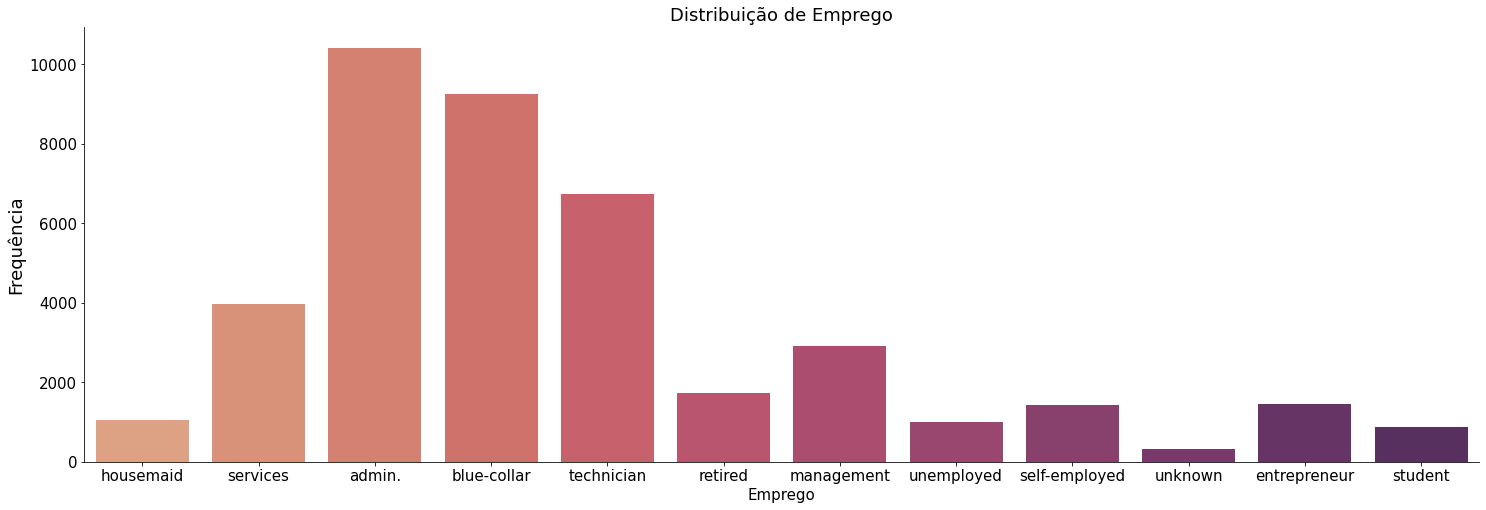

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = data, palette = "flare")
ax.set_xlabel('Emprego', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição de Emprego', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['job'].value_counts()

#### Distribuição do Estado Conjugal

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

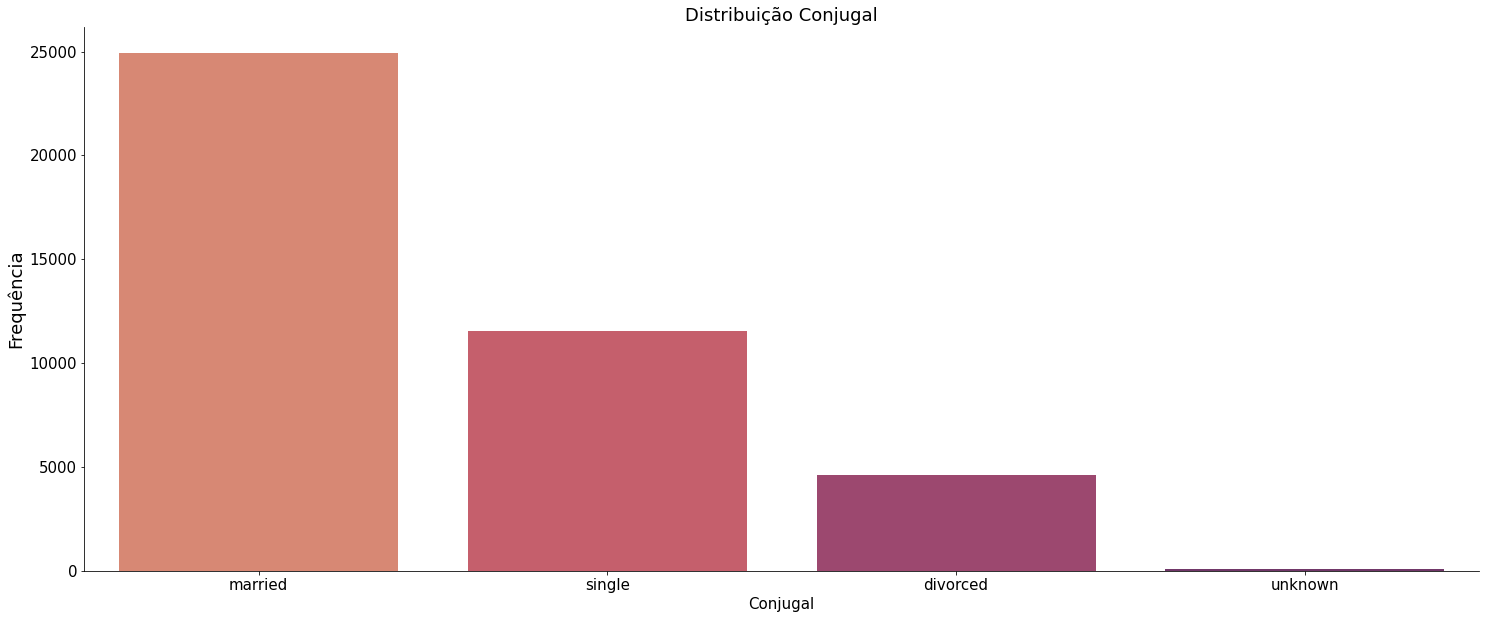

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'marital', data = data, palette = "flare")
ax.set_xlabel('Conjugal', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição Conjugal', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['marital'].value_counts()

#### Distribuição de Educação

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

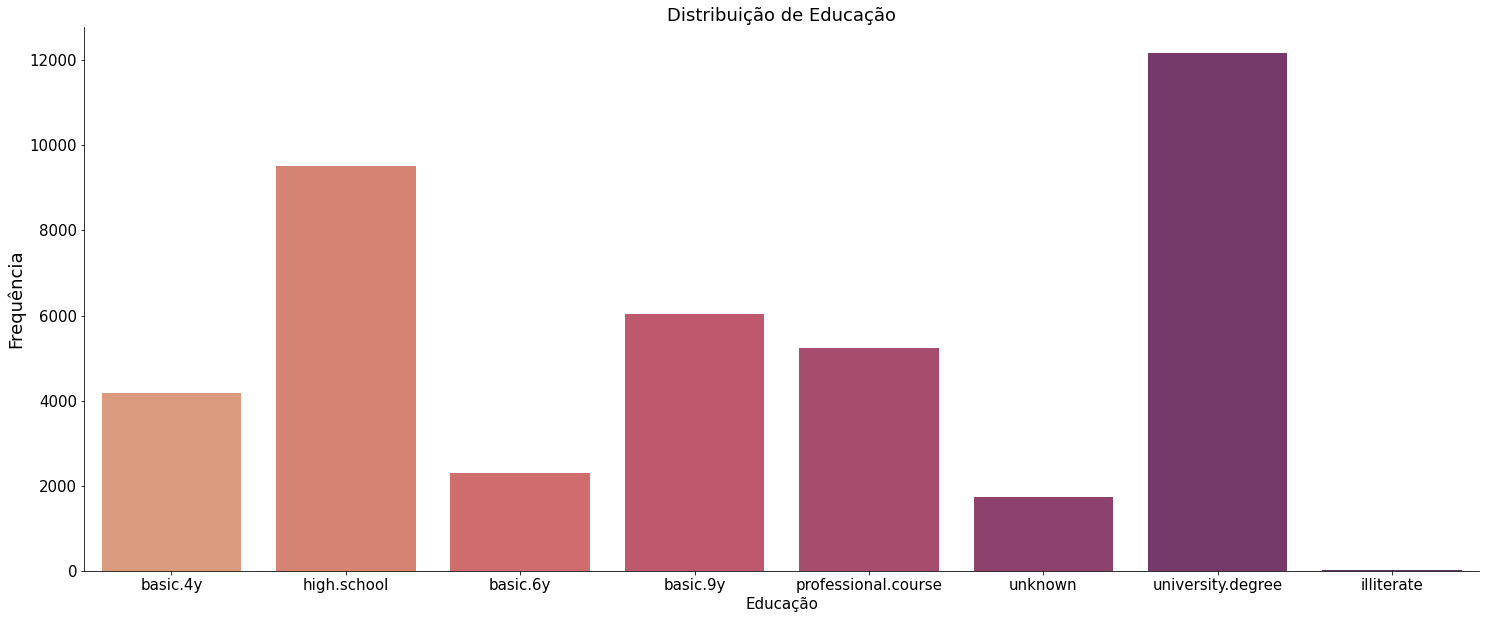

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'education', data = data, palette = "flare")
ax.set_xlabel('Educação', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição de Educação', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['education'].value_counts()

#### Distribuição de Incumprimento
Tem crédito em incumprimento?

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

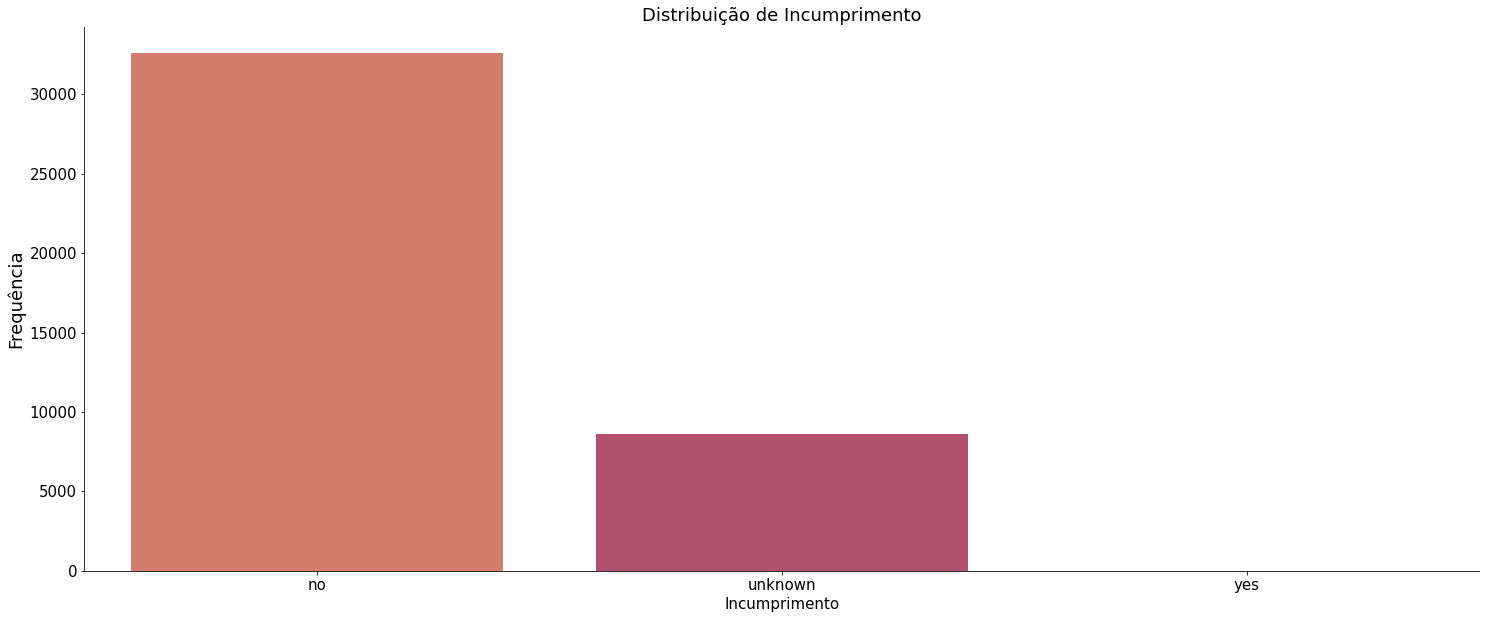

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'default', data = data, palette = "flare")
ax.set_xlabel('Incumprimento', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição de Incumprimento', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['default'].value_counts()

#### Distribuição Habitacional
Tem crédito habitacional?

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

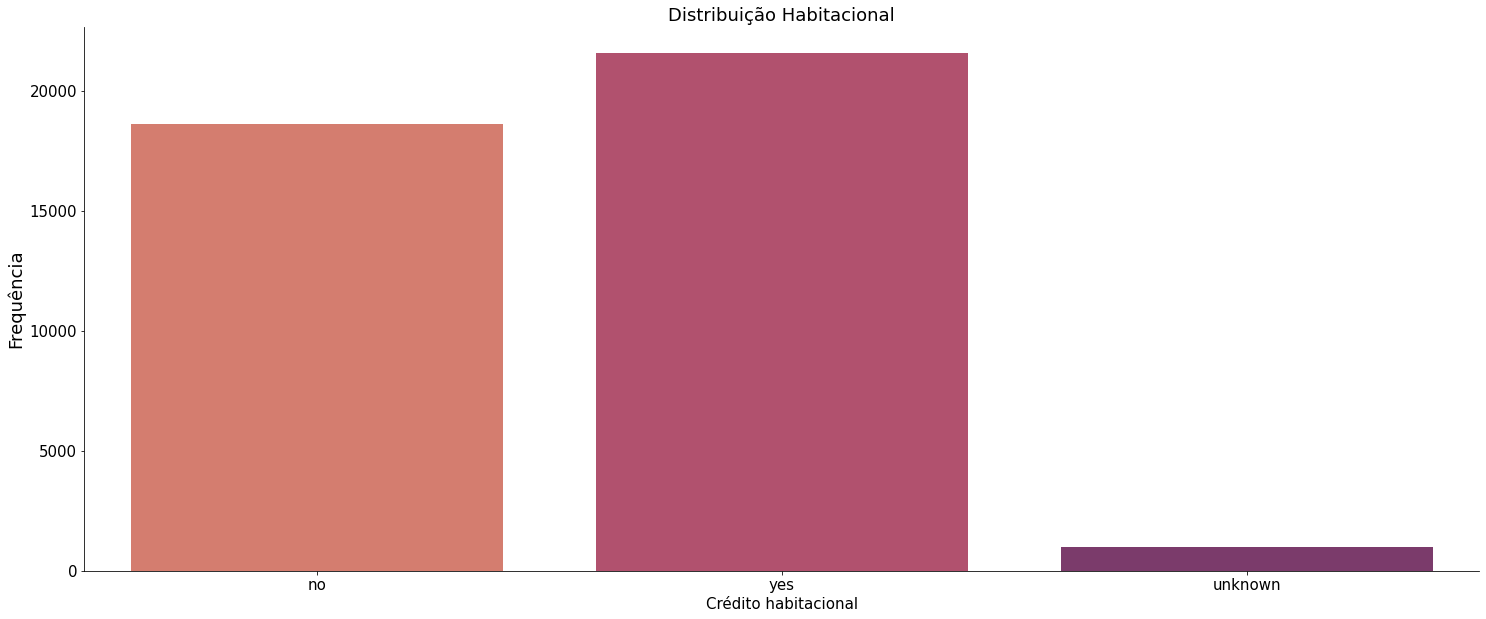

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'housing', data = data, palette = "flare")
ax.set_xlabel('Crédito habitacional', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição Habitacional', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['housing'].value_counts()

#### Distribuição de Empréstimo 
Tem empréstimo pessoal?

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

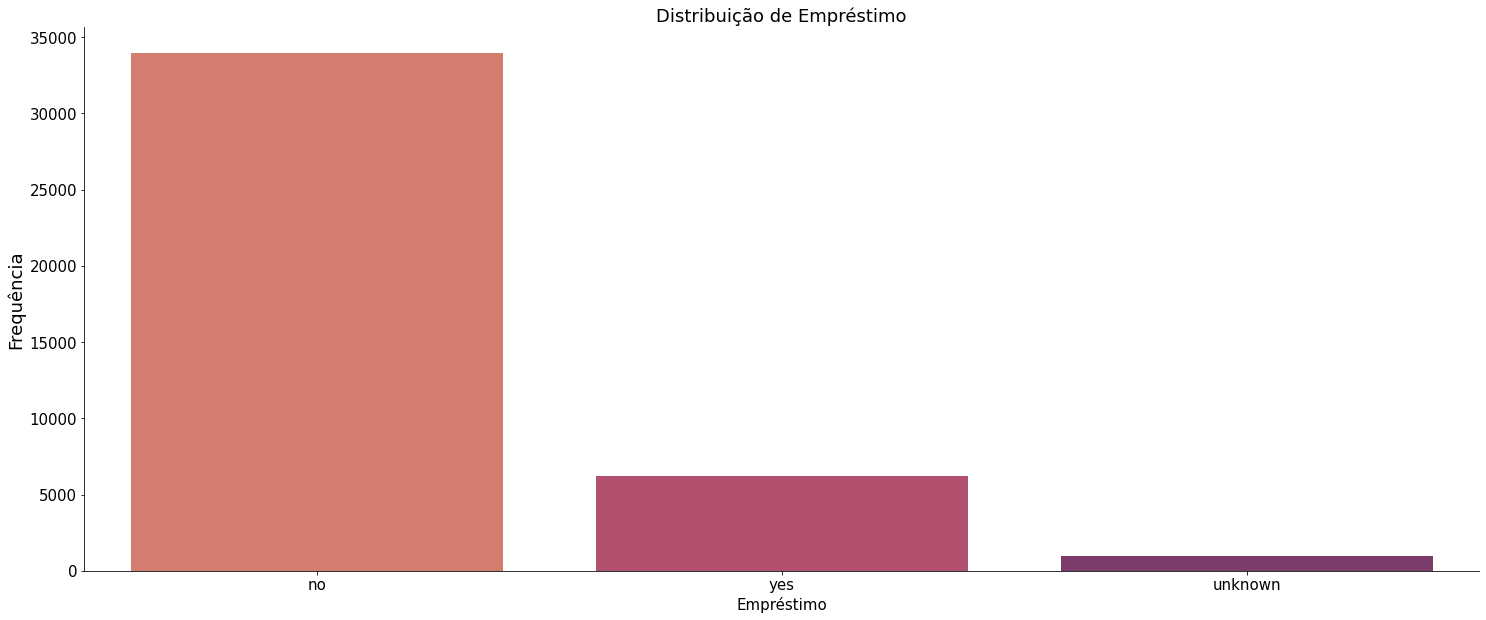

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'loan', data = data, palette = "flare")
ax.set_xlabel('Empréstimo', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição de Empréstimo', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['loan'].value_counts()

### Distribuição dos dados relacionados com o último contacto da campanha atual

#### Distribuição do Tipo de Contacto e Duração

Agrupar duração por intervalos

In [14]:
def duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration'] = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration'] = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5

    return df

duration(data)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


cellular     26144
telephone    15044
Name: contact, dtype: int64

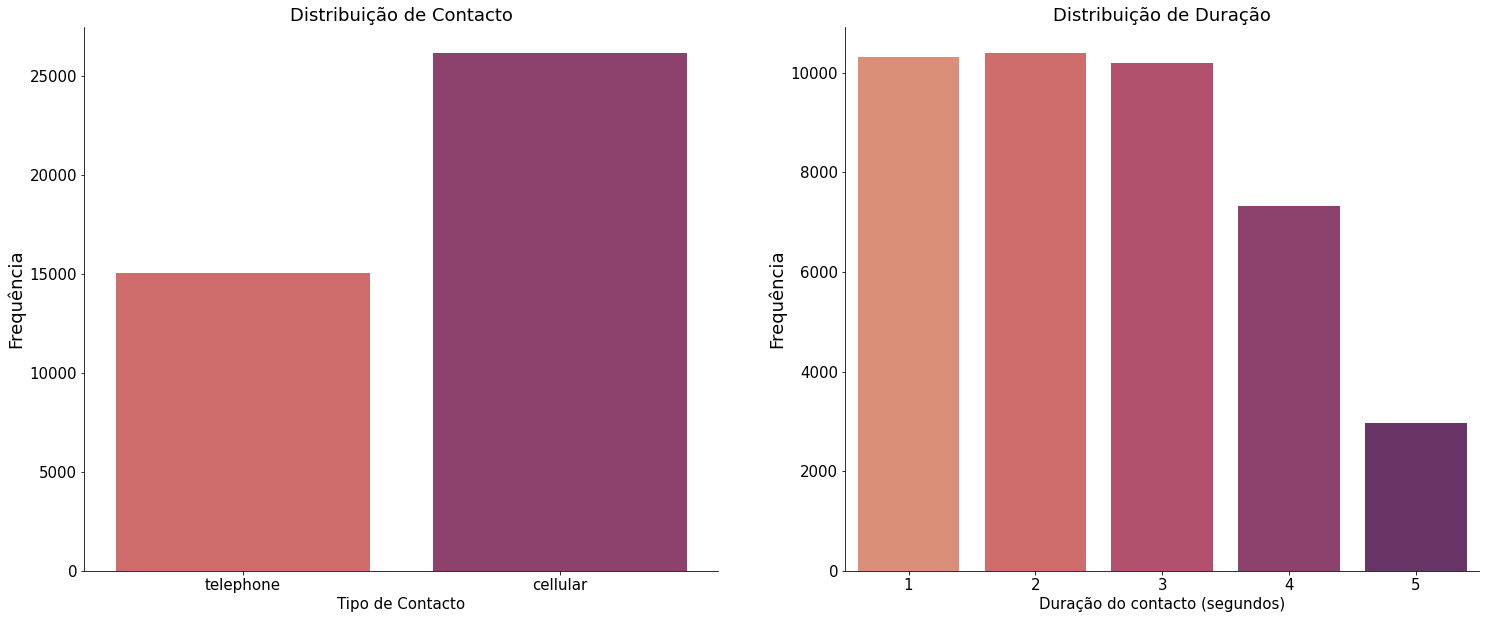

In [15]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (25,10))
sns.countplot(x = 'contact', data = data, palette = "flare", ax = ax1)
ax1.set_xlabel('Tipo de Contacto', fontsize=15)
ax1.set_ylabel('Frequência', fontsize=18)
ax1.set_title('Distribuição de Contacto', fontsize=18)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'duration', data = data, palette = "flare", ax = ax2)
ax2.set_xlabel('Duração do contacto (segundos)', fontsize=15)
ax2.set_ylabel('Frequência', fontsize=18)
ax2.set_title('Distribuição de Duração', fontsize=18)
ax2.tick_params(labelsize=15)
sns.despine()

data['duration'].value_counts()
data['contact'].value_counts()

#### Distruições Mensal e Semanal

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

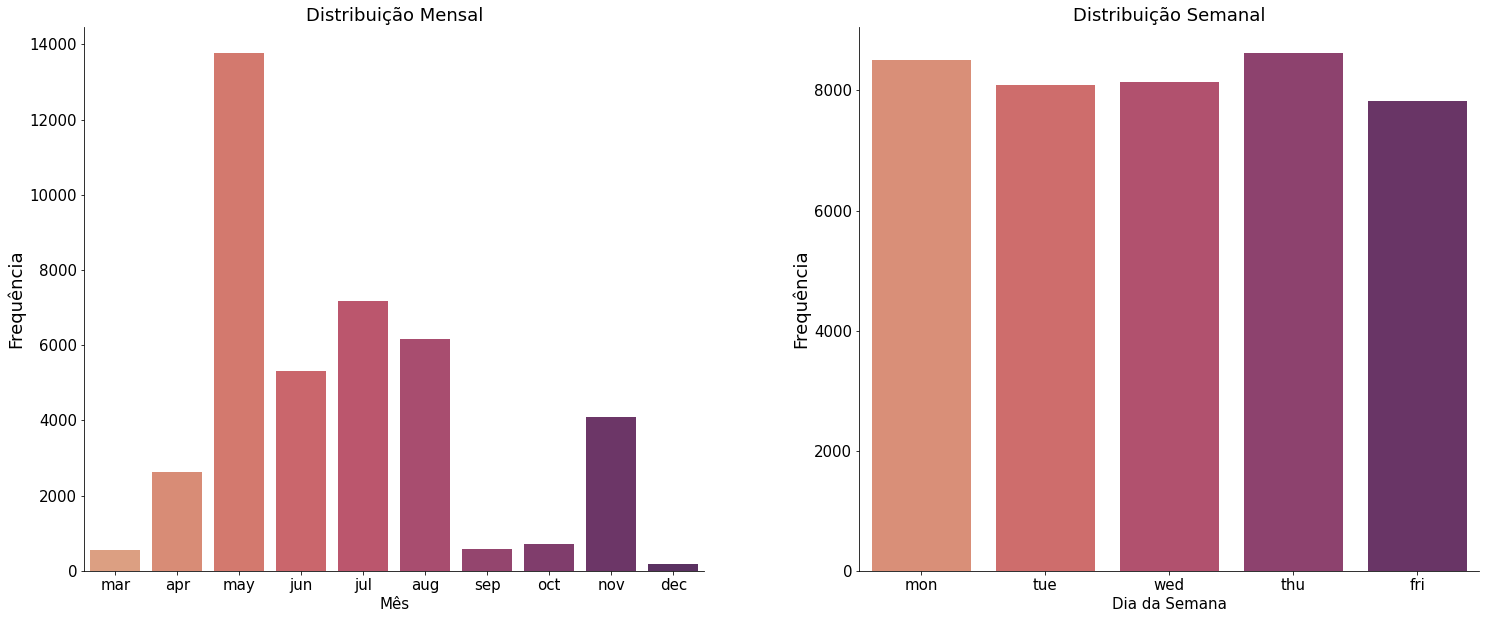

In [16]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (25,10))
sns.countplot(x = 'month', data = data, palette = "flare", ax = ax1, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax1.set_xlabel('Mês', fontsize=15)
ax1.set_ylabel('Frequência', fontsize=18)
ax1.set_title('Distribuição Mensal', fontsize=18)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'day_of_week', data = data, palette = "flare", ax = ax2)
ax2.set_xlabel('Dia da Semana', fontsize=15)
ax2.set_ylabel('Frequência', fontsize=18)
ax2.set_title('Distribuição Semanal', fontsize=18)
ax2.tick_params(labelsize=15)
sns.despine()

plt.subplots_adjust(wspace = 0.25)

data['day_of_week'].value_counts()
data['month'].value_counts()

### Distribuição dos dados em contextos sociais e económicos

#### Distribuição da Taxa de Variação de Emprego - Indicador Trimestral

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

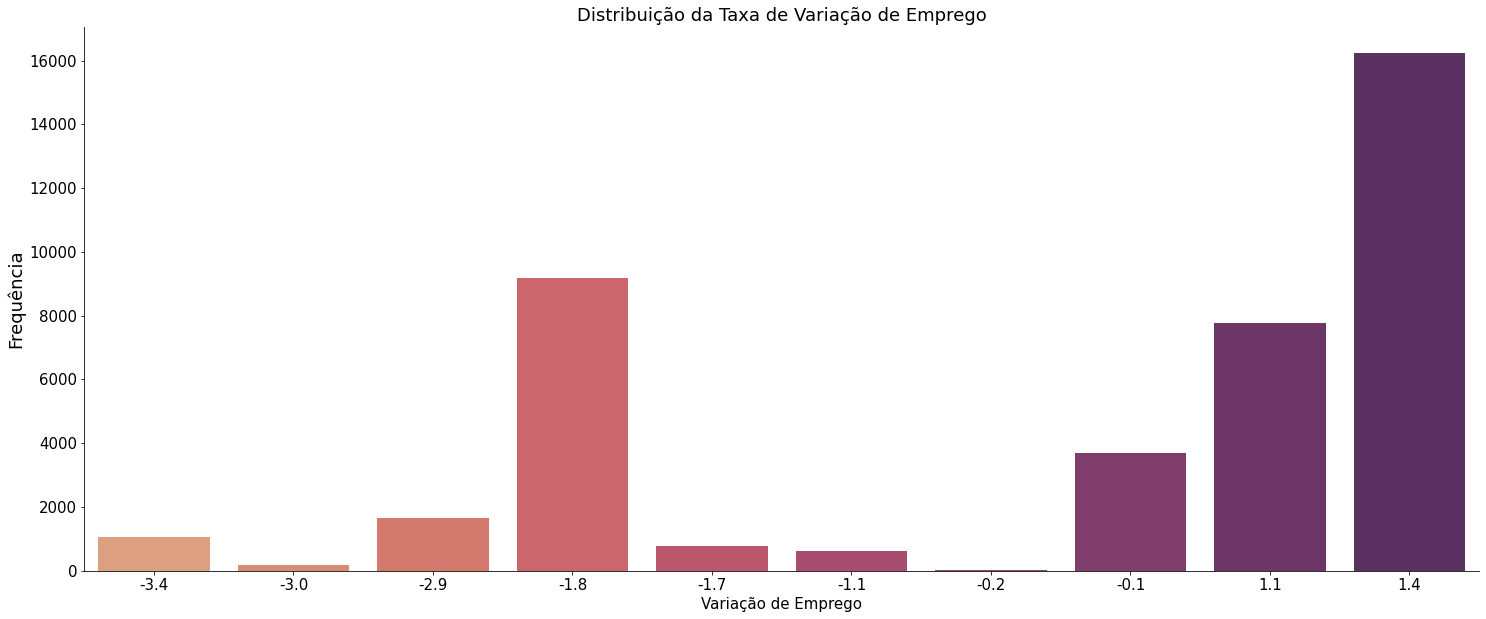

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(data=data, x="emp.var.rate", palette = "flare")
ax.set_xlabel('Variação de Emprego', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição da Taxa de Variação de Emprego', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['emp.var.rate'].value_counts()

#### Distribuição do Índice de Preços ao Consumidor - Indicador Mensal

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

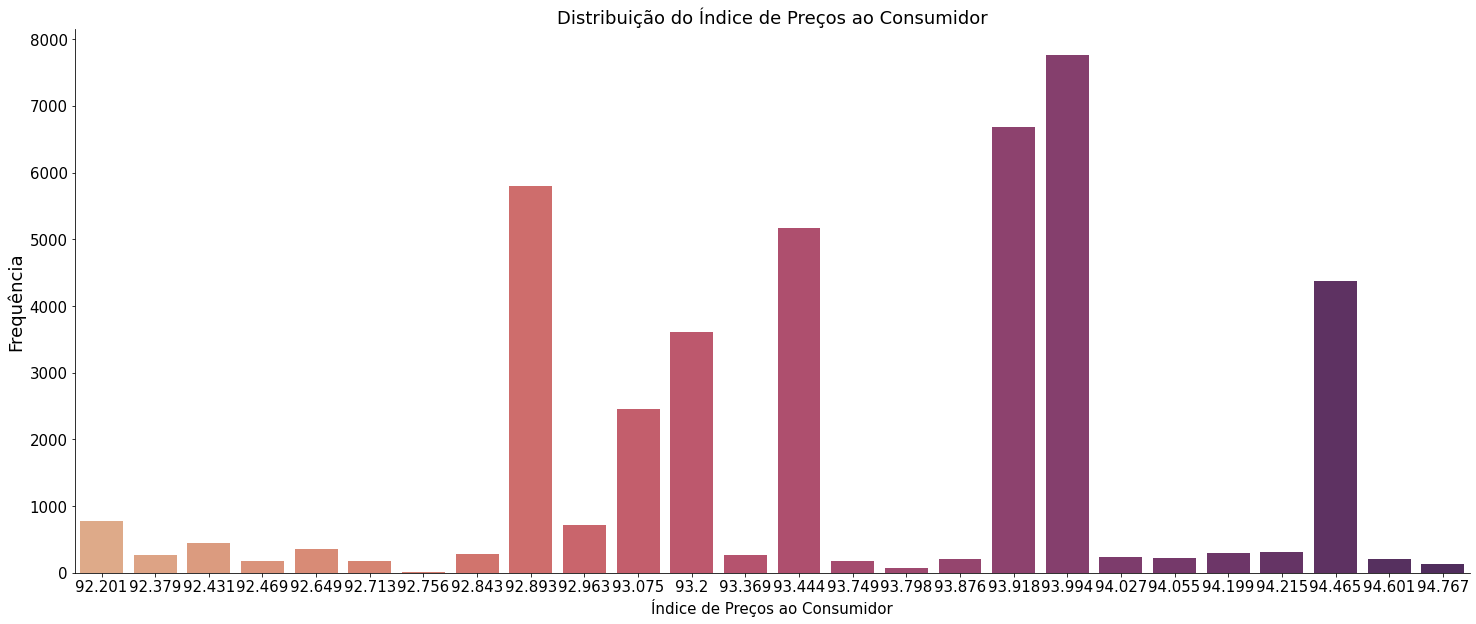

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(data=data, x="cons.price.idx", palette = "flare")
ax.set_xlabel('Índice de Preços ao Consumidor', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição do Índice de Preços ao Consumidor', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['cons.price.idx'].value_counts()

#### Distribuição do Índice de Confiança do Consumidor - Indicador Mensal

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

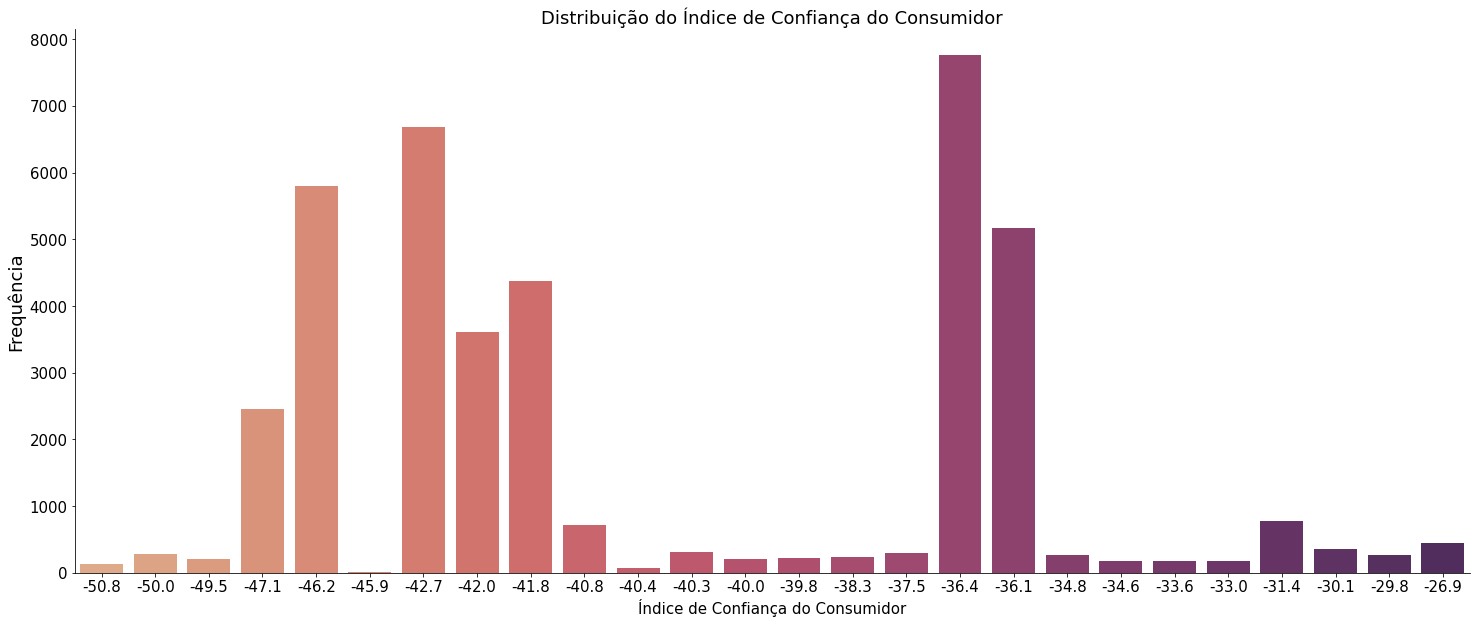

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(data=data, x="cons.conf.idx", palette = "flare")
ax.set_xlabel('Índice de Confiança do Consumidor', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição do Índice de Confiança do Consumidor', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['cons.conf.idx'].value_counts()

#### Distribuição da Taxa Euribor de 3 meses - Indicador Diário

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
1.047       1
0.933       1
3.329       1
3.816       1
1.574       1
Name: euribor3m, Length: 316, dtype: int64

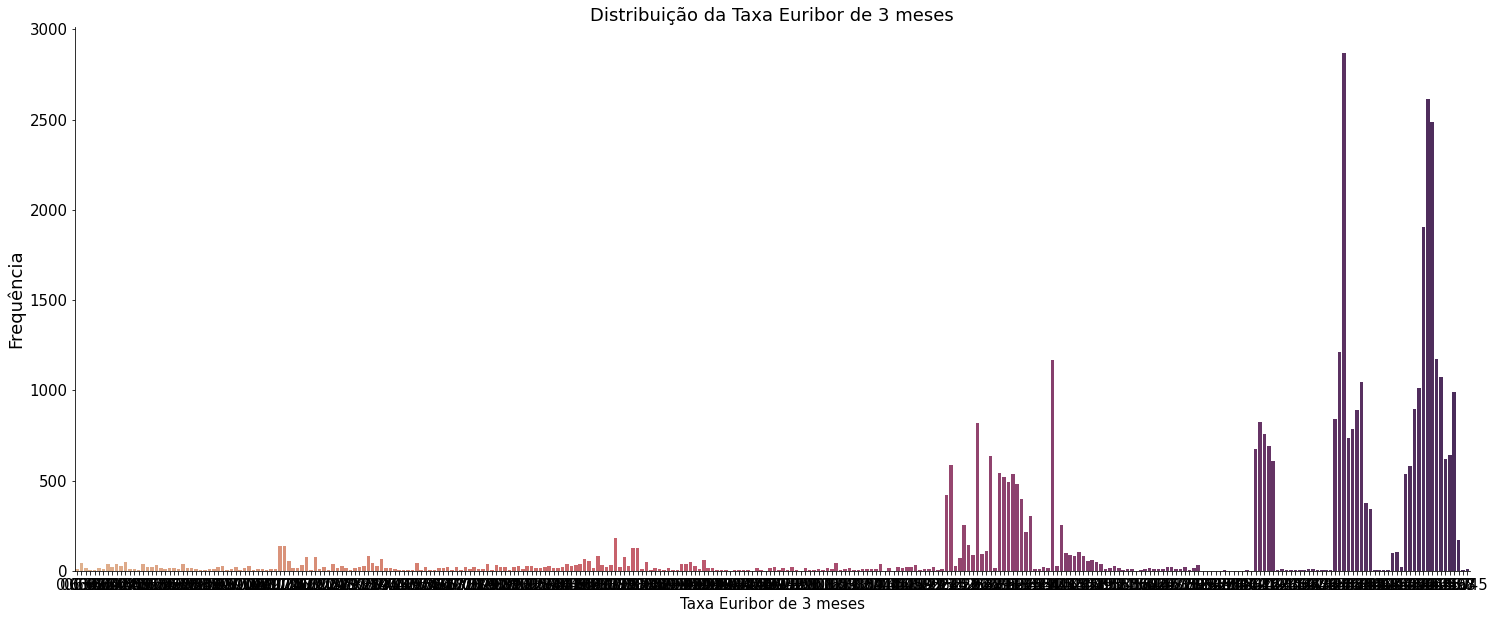

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(data=data, x="euribor3m", palette = "flare")
ax.set_xlabel('Taxa Euribor de 3 meses', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição da Taxa Euribor de 3 meses', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['euribor3m'].value_counts()

#### Distribuição do Número de Empregados - Indicador Trimestral

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

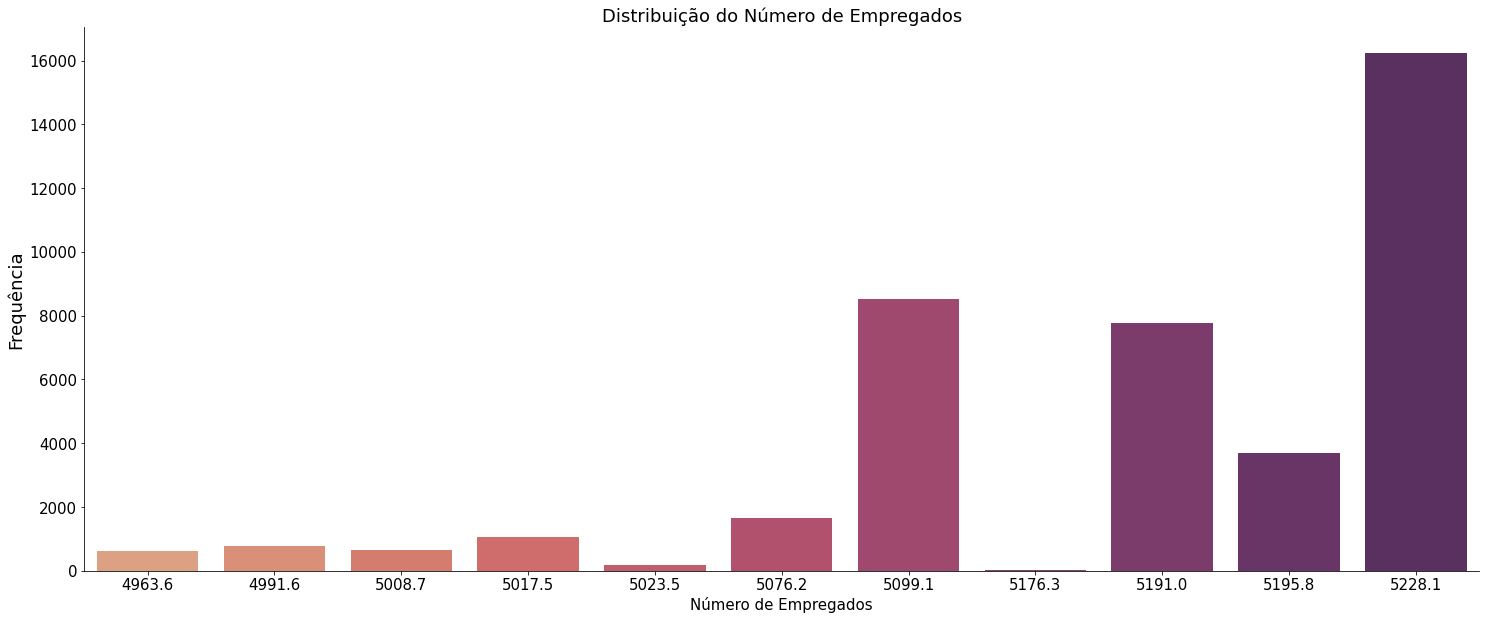

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(data=data, x="nr.employed", palette = "flare")
ax.set_xlabel('Número de Empregados', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição do Número de Empregados', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['nr.employed'].value_counts()

### Distribuição dos dados em outros contextos

#### Distribuição do Número de Contactos Realizados durante a Campanha para cada cliente

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
26        8
28        8
25        8
30        7
31        7
35        5
33        4
32        4
34        3
43        2
42        2
40        2
41        1
56        1
39        1
37        1
Name: campaign, dtype: int64

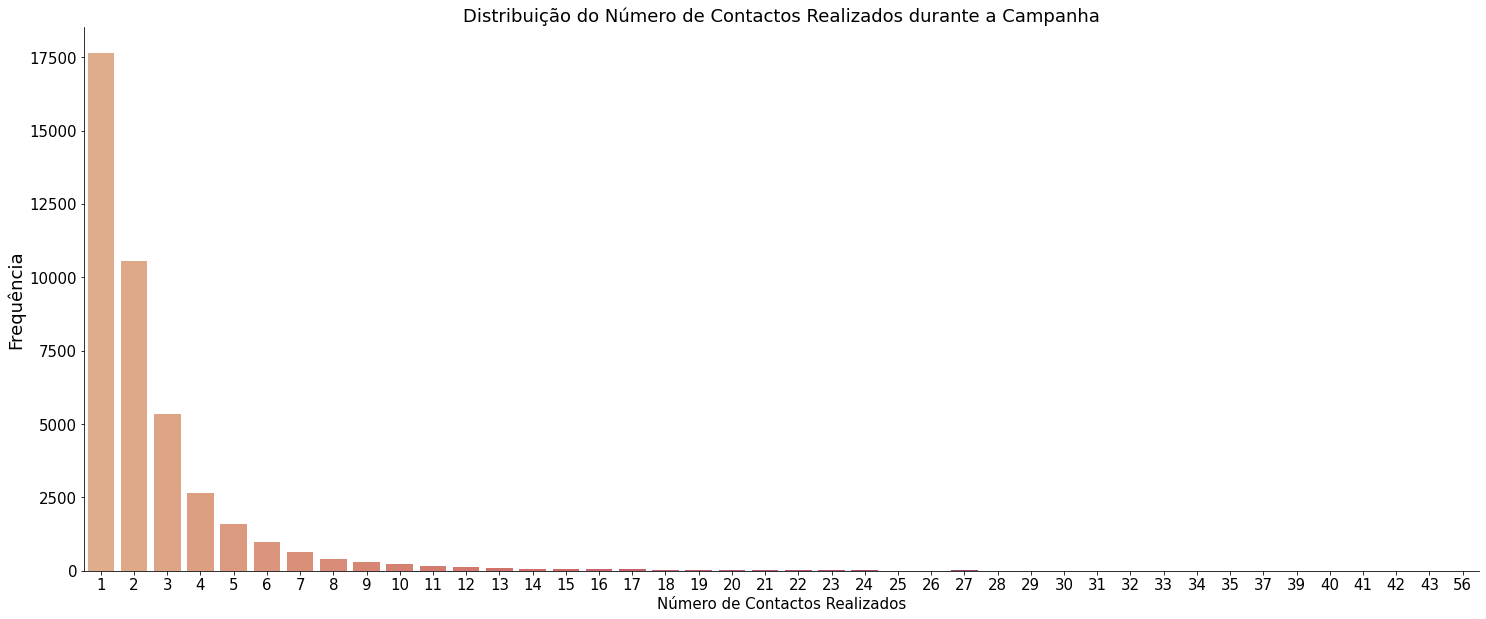

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(data=data, x="campaign", palette = "flare")
ax.set_xlabel('Número de Contactos Realizados', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição do Número de Contactos Realizados durante a Campanha', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['campaign'].value_counts()

#### Distribuição do Número de Dias após último contacto do cliente da Campanha Anterior para cada cliente

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

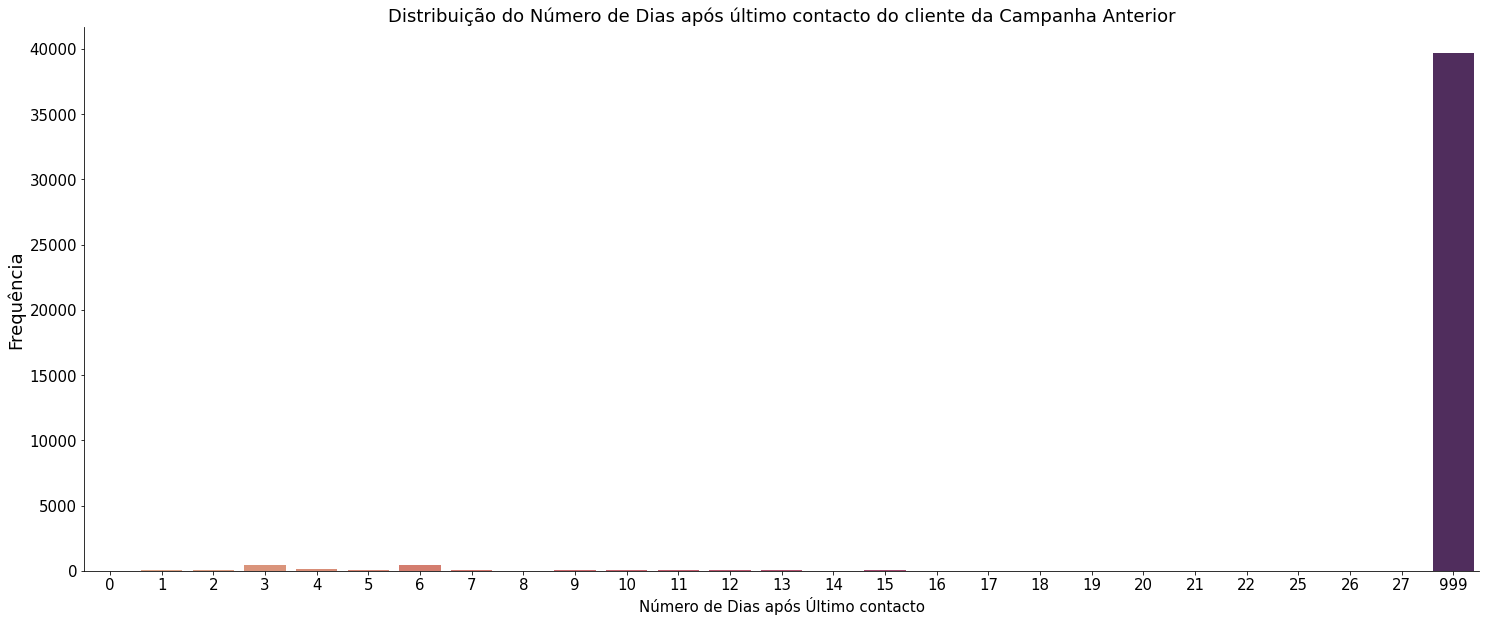

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(data=data, x="pdays", palette = "flare")
ax.set_xlabel('Número de Dias após Último contacto', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição do Número de Dias após último contacto do cliente da Campanha Anterior', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['pdays'].value_counts()

#### Distribuição do Número de Contactos Realizados previamente à Campanha para cada cliente

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

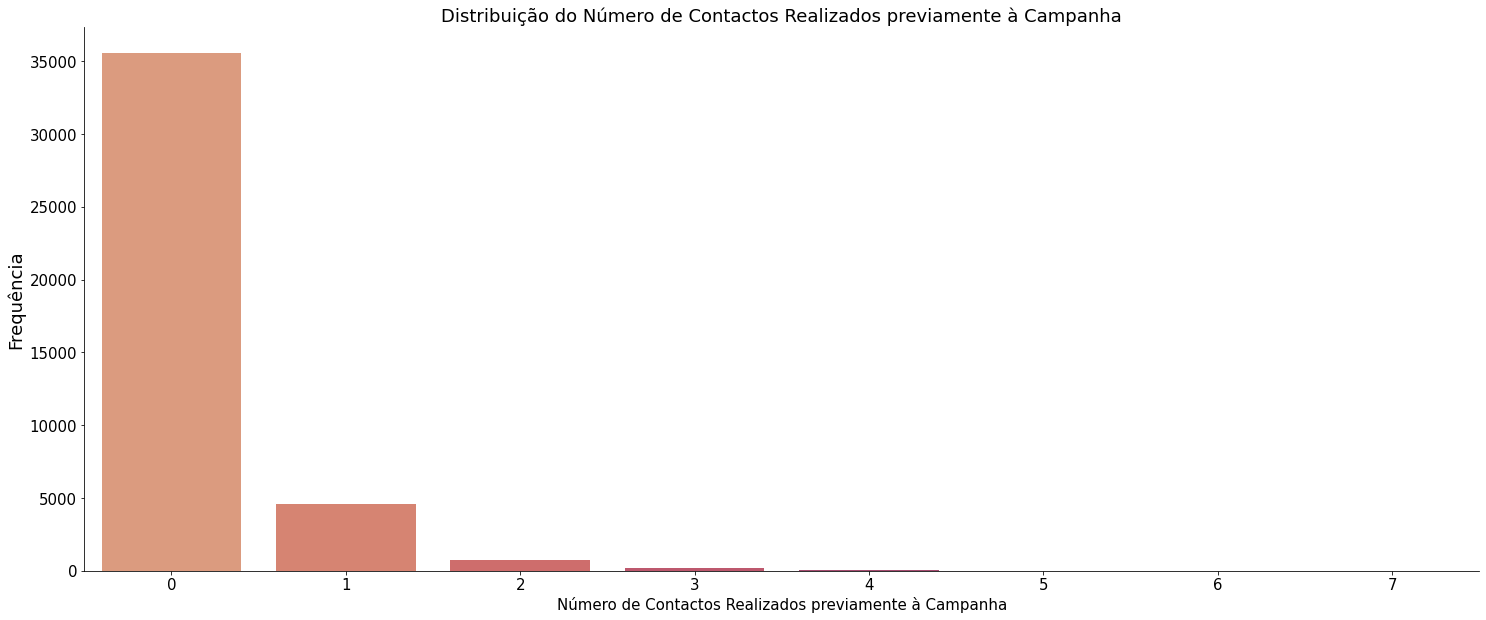

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(data=data, x="previous", palette = "flare")
ax.set_xlabel('Número de Contactos Realizados previamente à Campanha', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição do Número de Contactos Realizados previamente à Campanha', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['previous'].value_counts()

#### Distribuição do Resultado da Campanha de Marketing Anterior para cada cliente

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

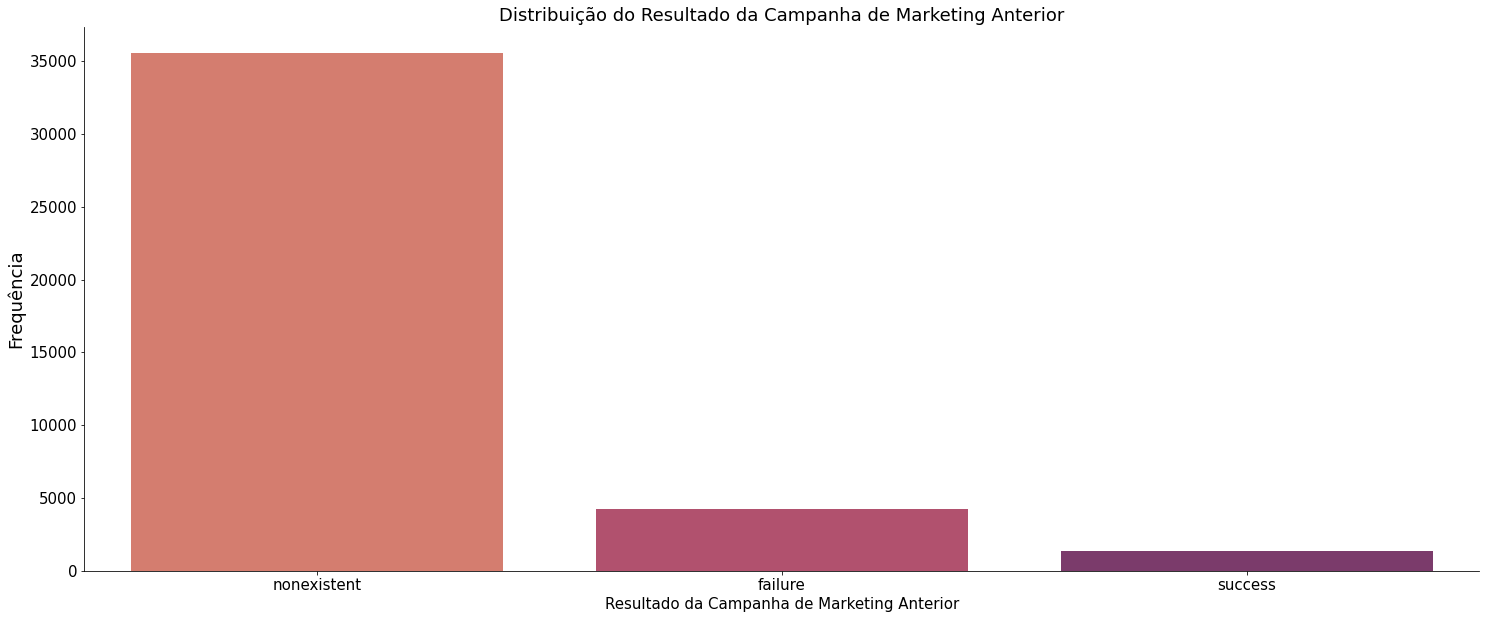

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(data=data, x="poutcome", palette = "flare")
ax.set_xlabel('Resultado da Campanha de Marketing Anterior', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição do Resultado da Campanha de Marketing Anterior', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['poutcome'].value_counts()

### Distribuição dos dados da variável de interesse
O cliente assinou um depósito a prazo?

no     36548
yes     4640
Name: y, dtype: int64

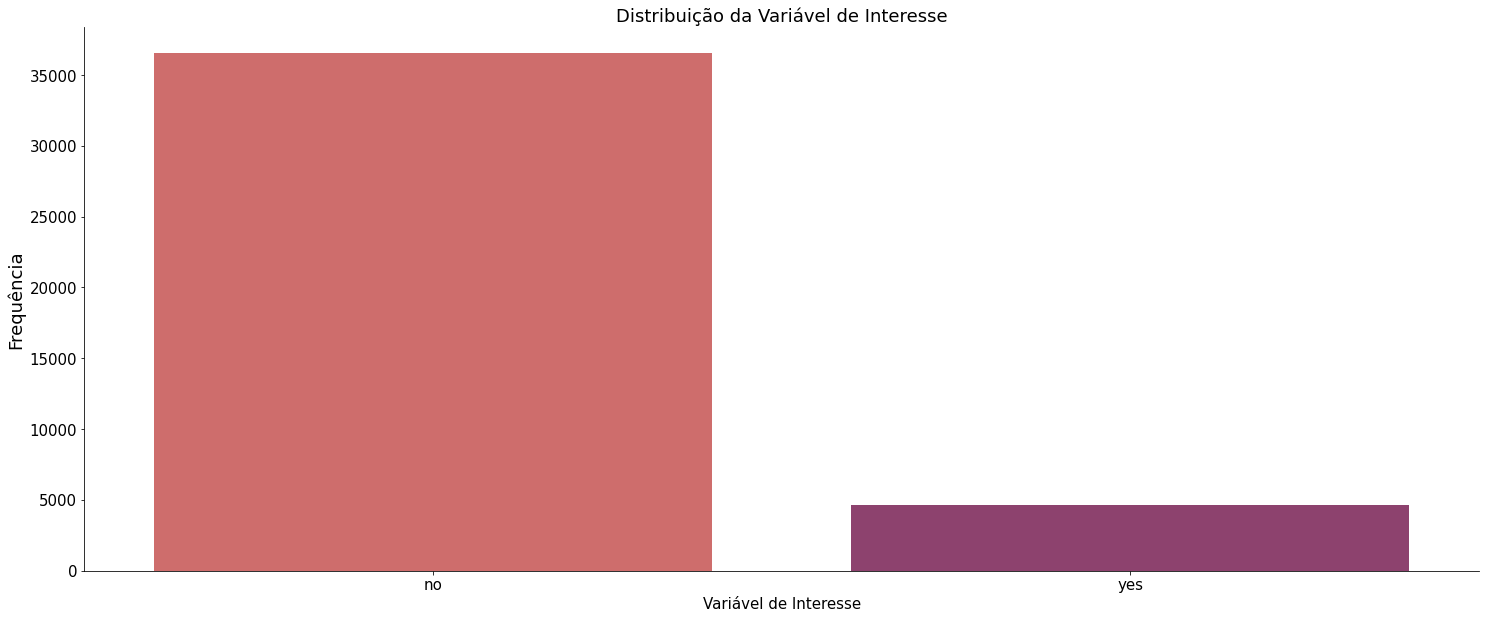

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(data=data, x="y", palette = "flare")
ax.set_xlabel('Variável de Interesse', fontsize=15)
ax.set_ylabel('Frequência', fontsize=18)
ax.set_title('Distribuição da Variável de Interesse', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['y'].value_counts()

### Correlação entre Variáveis

#### Correlação entre Emprego e a Assinatura de depósito a prazo

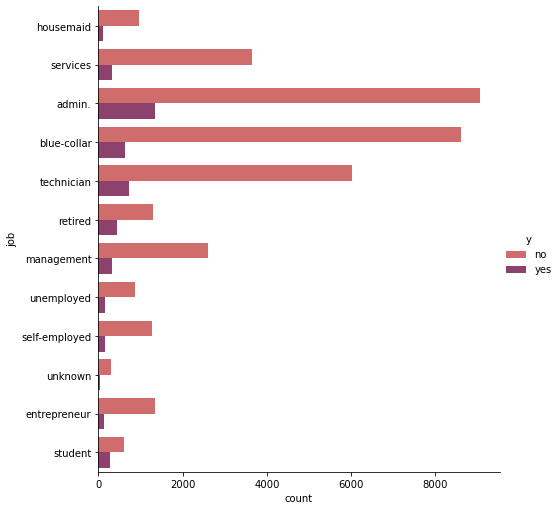

In [27]:
sns.catplot(y="job", hue="y", data=data, kind="count", palette="flare", height=7);

#### Correlação entre Estado Conjugal e a Assinatura de depósito a prazo

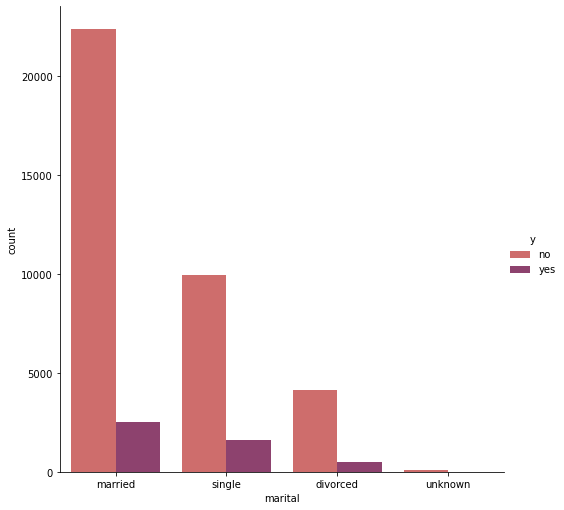

In [28]:
sns.catplot(x="marital", hue="y", data=data, kind="count", palette="flare", height=7);

#### Correlação entre Educação e a Assinatura de depósito a prazo

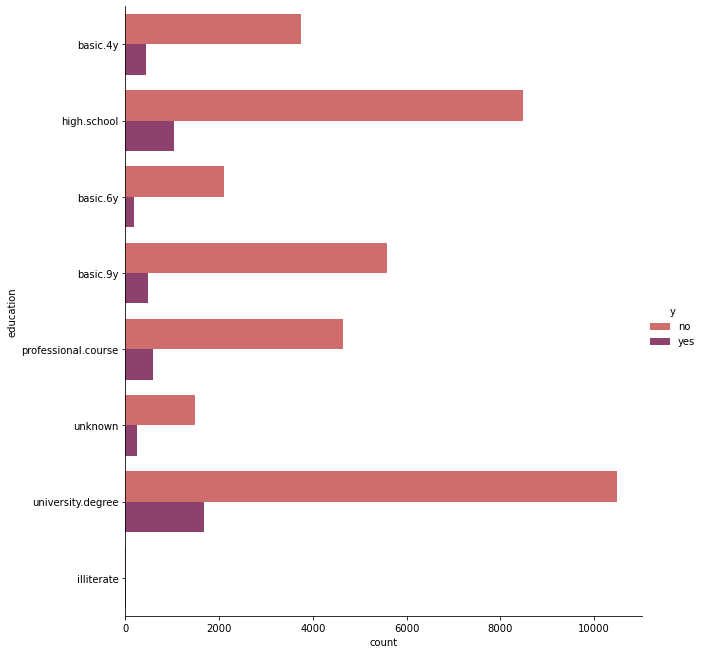

In [29]:
sns.catplot(y="education", hue="y", data=data, kind="count", palette="flare", height=9);

#### Correlação entre Contacto Prévio e a Assinatura de depósito a prazo

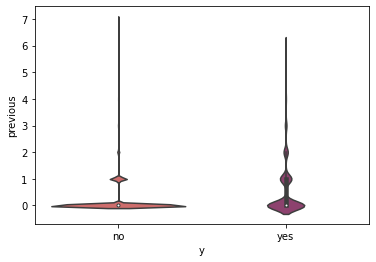

In [30]:
ax = sns.violinplot(x="y", y="previous", data=data, palette="flare", height=10)

### Normalização dos dados 

In [31]:
data_m1 = pd.read_csv('../../Data_AA2/bank-additional-full.csv', sep = ';')
data_m1.head()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_m1['job'] = le.fit_transform(data_m1['job']) 
data_m1['marital'] = le.fit_transform(data_m1['marital']) 
data_m1['education'] = le.fit_transform(data_m1['education']) 
data_m1['default'] = le.fit_transform(data_m1['default']) 
data_m1['housing'] = le.fit_transform(data_m1['housing']) 
data_m1['loan'] = le.fit_transform(data_m1['loan'])
data_m1['contact'] = le.fit_transform(data_m1['contact']) 
data_m1['month'] = le.fit_transform(data_m1['month']) 
data_m1['day_of_week'] = le.fit_transform(data_m1['day_of_week'])
data_m1['poutcome'] = le.fit_transform(data_m1['poutcome'])

data_m1['y'].replace(['no', 'yes'], [0,1], inplace  = True)
data_m1.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


Agrupar idades por faixa etária

In [32]:
def age(df):
    df.loc[df['age'] <= 19, 'age'] = 1
    df.loc[(df['age'] > 19) & (df['age'] <= 30), 'age'] = 2
    df.loc[(df['age'] > 30) & (df['age'] <= 60), 'age'] = 3
    df.loc[(df['age'] > 60) & (df['age'] <= 98), 'age'] = 4
           
    return df

age(data_m1)
data_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,3,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,3,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


Agrupar duração por intervalos

In [33]:
def duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration'] = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration'] = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5

    return df

duration(data_m1)
data_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,3,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,3,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#### Matriz de Correlação entre os Valores Numéricos

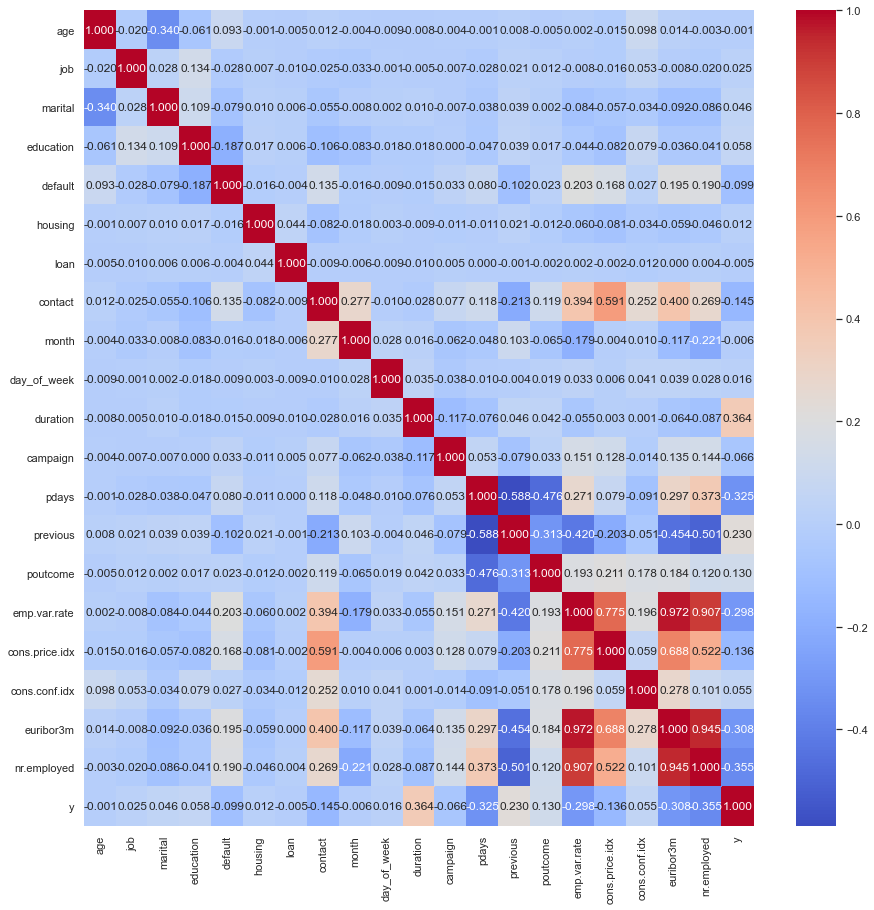

In [34]:
sns.set(rc={'figure.figsize':(15,15)})
n_values_graph = sns.heatmap(data_m1.corr(),annot=True,fmt = ".3f" ,cmap = "coolwarm")
plt.show()